In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
%matplotlib inline

In [2]:
allocs = pd.Series([.3, .3, .35, .05, 1], index=['ES','NQ', 'GC', 'CL', 'total'])
#allocs = pd.Series([2/3, 1/3, 1], index=['ES','NQ', 'total'])
cash = 100000

In [3]:
df = pd.read_csv('/home/tomek/ib_tools/backtests/backtest_2020-05-27_20-00_20190101_20191231.csv')
del df['sys_time']
del df['exec_ids']
try:
    del df['perm_id']
    del df['com_reports']
except:
    pass
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])

In [4]:
df.groupby('contract').realizedPNL.sum()

contract
CL    -2692.18
ES    16611.90
GC    -2019.96
NQ    18956.40
Name: realizedPNL, dtype: float64

In [5]:
df.realizedPNL.sum()

30856.15999999999

In [6]:
df[df['contract'] == 'NQ'].head(50)

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2019-01-02 09:22:00,NQ,SELL,1,6192.25,5,ENTRY,2.1,0.0,100035.16
2019-01-02 10:17:00,NQ,BUY,1,6189.00,6,STOP-LOSS,2.1,60.8,100095.96
2019-01-02 19:09:00,NQ,BUY,1,6392.00,13,ENTRY,2.1,0.0,99956.90
2019-01-02 20:08:00,NQ,SELL,1,6376.50,14,STOP-LOSS,2.1,-314.2,99642.70
2019-01-03 07:03:00,NQ,SELL,1,6209.00,21,ENTRY,2.1,0.0,99328.18
2019-01-03 08:00:00,NQ,BUY,1,6221.75,22,STOP-LOSS,2.1,-259.2,99068.98
2019-01-03 09:59:00,NQ,SELL,1,6205.50,27,ENTRY,2.1,0.0,99094.14
2019-01-03 13:02:00,NQ,BUY,1,6222.25,28,STOP-LOSS,2.1,-339.2,98150.20
2019-01-03 16:40:00,NQ,SELL,1,6182.75,29,ENTRY,2.1,0.0,98150.20


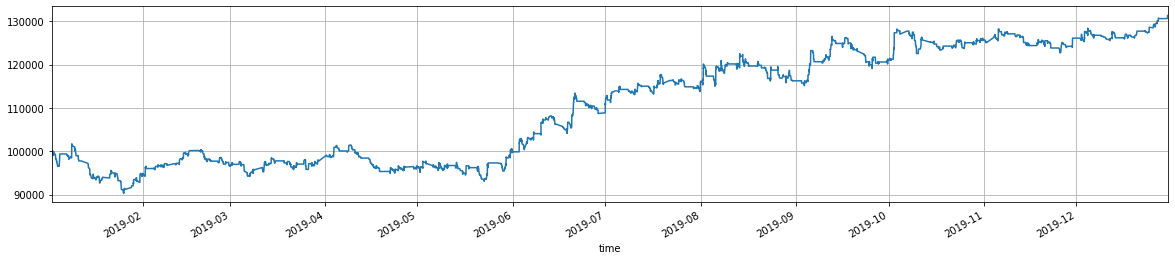

In [7]:
df.cash.plot(figsize=(20,4), grid=True);

In [8]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [9]:
df

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2019-01-02 06:19:00,GC,BUY,1,1287.10,1,ENTRY,2.42,0.00,100000.00
2019-01-02 07:00:00,CL,SELL,1,44.74,3,ENTRY,2.37,0.00,100000.00
2019-01-02 08:13:00,GC,SELL,1,1287.50,2,STOP-LOSS,2.42,35.16,100035.16
2019-01-02 09:22:00,NQ,SELL,1,6192.25,5,ENTRY,2.10,0.00,100035.16
2019-01-02 09:43:00,GC,BUY,1,1289.70,7,ENTRY,2.42,0.00,100035.16
...,...,...,...,...,...,...,...,...,...
2019-12-30 16:17:00,NQ,BUY,1,8704.50,3806,STOP-LOSS,2.10,-89.20,131105.74
2019-12-30 17:32:00,CL,SELL,1,61.31,3807,ENTRY,2.37,0.00,131105.74
2019-12-30 17:39:00,CL,BUY,1,61.41,3808,STOP-LOSS,2.37,-104.74,131001.00


In [10]:
df[(df['contract'] == 'GC')]

,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,
2019-01-02 06:19:00,GC,BUY,1,1287.1,1,ENTRY,2.42,0.00,100000.00
2019-01-02 08:13:00,GC,SELL,1,1287.5,2,STOP-LOSS,2.42,35.16,100035.16
2019-01-02 09:43:00,GC,BUY,1,1289.7,7,ENTRY,2.42,0.00,100035.16
2019-01-02 10:56:00,GC,SELL,1,1289.1,8,STOP-LOSS,2.42,-64.84,100031.12
2019-01-02 19:54:00,GC,SELL,1,1280.8,15,ENTRY,2.42,0.00,99956.90
...,...,...,...,...,...,...,...,...,...
2019-12-27 06:16:00,GC,SELL,1,1517.0,3790,STOP-LOSS,2.42,-84.84,129493.66
2019-12-27 17:28:00,GC,BUY,1,1519.0,3795,ENTRY,2.42,0.00,130727.12
2019-12-27 17:44:00,GC,SELL,1,1518.2,3796,STOP-LOSS,2.42,-84.84,130642.28


In [11]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 CL     714
 ES     286
 GC    1438
 NQ    1366
 Name: action, dtype: int64, 3804)

In [12]:
# commission paid
df.groupby('contract').commission.sum()

contract
CL    1692.18
ES     600.60
GC    3479.96
NQ    2868.60
Name: commission, dtype: float64

In [13]:
df.commission.sum()

8641.340000000002

In [14]:
# per trade stats
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss','win_ratio', 'EV',
                               'number_of_positions'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    row['average_PNL'] = round(d.realizedPNL.mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0]).realizedPNL.mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0]).realizedPNL.mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_positions'] = d.realizedPNL.count()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV,number_of_positions
GC,0.39,-2.81,237.03,-154.00,1.54,-1.50,719.0
NQ,0.40,27.75,388.15,-207.86,1.87,30.54,683.0
CL,0.37,-7.54,538.34,-331.66,1.62,-9.76,357.0
ES,0.45,116.17,787.99,-428.09,1.84,119.15,143.0
total,0.39,16.22,392.92,-226.34,1.74,15.17,1902.0


In [15]:
daily = by_contract.resample('B').sum()
daily = daily.cumsum() +  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [16]:
# instrument correlations
log_returns = np.log(daily.pct_change()[1:] + 1)
log_returns.corr()

,CL,ES,GC,NQ,total
CL,1.000000,-0.015293,0.003126,-0.009390,0.255779
ES,-0.015293,1.000000,0.033950,0.248225,0.609786
GC,0.003126,0.033950,1.000000,0.156936,0.452277
NQ,-0.009390,0.248225,0.156936,1.000000,0.655544
total,0.255779,0.609786,0.452277,0.655544,1.000000


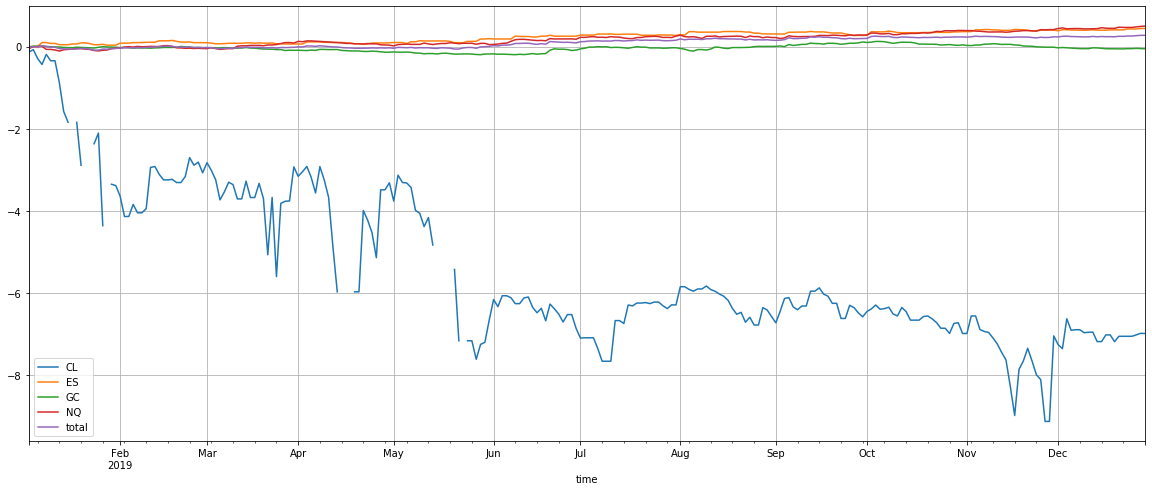

In [17]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

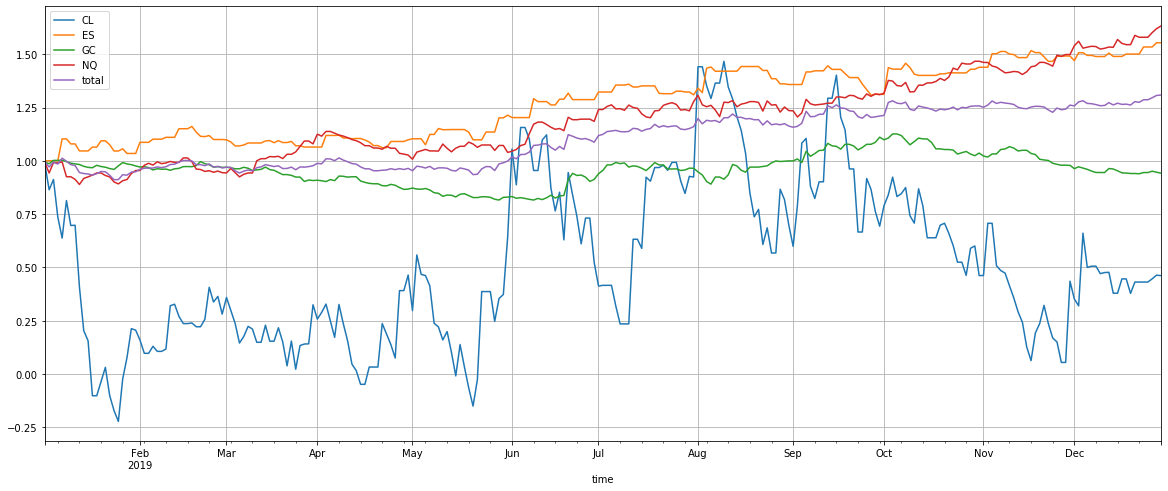

In [18]:
returns = daily.pct_change()
returns.iloc[0] = (daily.iloc[0] / (allocs * cash))-1
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [19]:
stats = pd.DataFrame()
for col in returns.columns:
    stats[col] = perf_stats(returns[col])
stats

,CL,ES,GC,NQ,total
Annual return,-0.528690,0.535335,-0.056198,0.610423,0.299085
Cumulative returns,-0.538436,0.553730,-0.057713,0.631880,0.308562
Annual volatility,27.336771,0.266147,0.206490,0.272272,0.193797
Sharpe ratio,-0.994510,1.740831,-0.178804,1.886511,1.446441
Calmar ratio,-0.432487,5.633485,-0.301384,5.331873,3.001720
Stability,NaN,0.902244,0.140423,0.948574,0.882565
Max drawdown,-1.222440,-0.095027,-0.186467,-0.114486,-0.099638
Omega ratio,0.653644,1.595971,0.967194,1.418038,1.295075
Sortino ratio,-1.121927,3.964117,-0.307049,3.191739,2.549402
Skew,-5.775290,2.753499,1.895493,0.421294,1.147678


In [20]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,CL,ES,GC,NQ,total
time,,,,,
2019-01-31,-96.61,3.44,-1.84,-3.73,-4.64
2019-02-28,36.57,6.32,-0.68,-1.07,1.90
2019-03-31,15.54,-3.21,-6.38,14.31,1.09
2019-04-30,-32.11,3.18,-4.41,-4.88,-1.30
2019-05-31,-96.45,10.54,-4.33,1.22,3.55
2019-06-30,-18.46,5.99,9.99,14.01,8.87
2019-07-31,76.48,1.74,5.72,7.86,6.71
2019-08-31,-24.47,3.70,3.59,-3.34,0.22
2019-09-30,-0.67,-3.39,11.13,6.04,4.07


In [21]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

CL      -100.0
ES        55.0
GC        -5.0
NQ        65.0
total     32.0
dtype: float64

In [22]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2019-10-02 20:46:00,ES,BUY,2891.00,3758.30
2019-08-05 21:19:00,ES,BUY,2841.00,3445.80
2019-01-08 16:53:00,ES,SELL,2548.50,3083.30
2019-06-10 03:01:00,ES,SELL,2880.75,2870.80
2019-05-23 16:33:00,CL,BUY,58.38,2605.26
...,...,...,...,...
2019-10-10 02:00:00,ES,BUY,2904.50,-929.20
2019-09-17 20:00:00,CL,BUY,59.58,-954.74
2019-01-14 02:50:00,ES,SELL,2575.75,-991.70
